In [2]:
import os
import sys
import json
import numpy as np
from sklearn.datasets import load_files
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import BernoulliNB
import math
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import itertools


In [3]:
BASE_DIR = ''
MAX_SEQUENCE_LENGTH = 150
MAX_NUM_WORDS = 4000
EMBEDDING_DIM = 100
VALIDATION_SPLIT = 0.2
num_words=1500

In [6]:
text=[]
sentiment=[]
with open('clean-data.json','r') as f:
    d = json.load(f)
    text.extend(d['text'].values())
    sentiment.extend(d['sentiment'].values())

X=text
Y=sentiment

In [7]:
X=[]
Y=[]
for i in range(len(sentiment)):
    if sentiment[i]!='neutral':
        X.append(text[i])
        Y.append(1 if sentiment[i]=='positive' else 0)

In [30]:
train_x=[]
train_y=[]#mark 1 as positive 0 as negative

In [31]:
file_list = os.listdir('aclImdb/train/pos')
for file in file_list:
    with open('aclImdb/train/pos/'+file,'rb') as f:
        s = f.read().decode('utf8')
        train_x.append(s)
pos_num=len(train_x)
train_y.extend([1]*pos_num)

In [32]:
file_list = os.listdir('aclImdb/train/neg')
for file in file_list:
    with open('aclImdb/train/neg/'+file,'rb') as f:
        s = f.read().decode('utf8')
        train_x.append(s)
neg_num=len(train_x)-pos_num
train_y.extend([0]*neg_num)

In [33]:
tokenizer = Tokenizer(num_words=num_words)

In [34]:
tokenizer.fit_on_texts(train_x)

x_train = tokenizer.texts_to_matrix(train_x)
x_test = tokenizer.texts_to_matrix(X)
y_train = train_y
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 88582 unique tokens.


In [35]:
y_test=Y

In [38]:
ber=BernoulliNB()
ber.fit(x_train,y_train)

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [39]:
y_pred = ber.predict(x_test)
print("Score for train: "+str(ber.score(x_train,y_train)))
print("Score: "+str(ber.score(x_test,y_test)))

Score for train: 0.83444
Score: 0.6628498727735369


In [42]:
confusion_matrix(y_test,y_pred,labels=[1,0])

array([[493,  28],
       [237,  28]], dtype=int64)

In [45]:
cnf_matrix = confusion_matrix(y_test, y_pred)
acc_score = accuracy_score(y_test, y_pred)

print('Accuracy Score: ', acc_score)
print(cnf_matrix)

Accuracy Score:  0.6628498727735369
[[ 28 237]
 [ 28 493]]


In [48]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

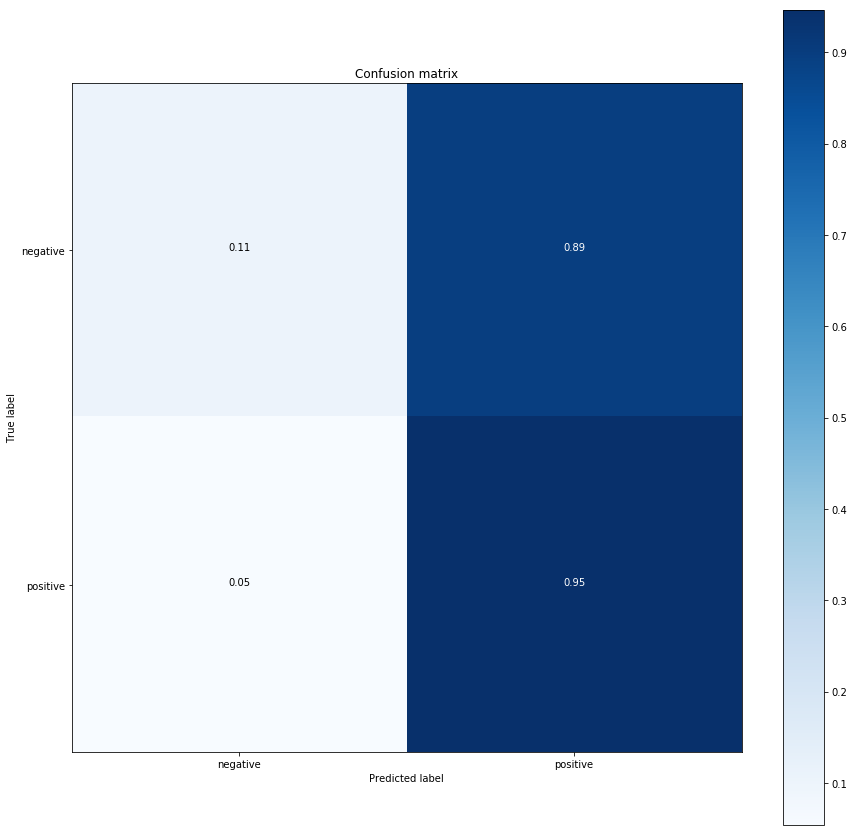

In [52]:
text_labels = ['negative','positive']

plt.figure(figsize=(15,15))
plot_confusion_matrix(cnf_matrix, classes=text_labels, title="Confusion matrix")
plt.show()

In [2]:
reviews_train = load_files("aclImdb/train/")
text_train, y_train = reviews_train.data, reviews_train.target

print("Number of documents in train data: {}".format(len(text_train)))
print("Samples per class (train): {}".format(np.bincount(y_train)))

reviews_test = load_files("aclImdb/test/")
text_test, y_test = reviews_test.data, reviews_test.target

print("Number of documents in test data: {}".format(len(text_test)))
print("Samples per class (test): {}".format(np.bincount(y_test)))

Number of documents in train data: 75000
Samples per class (train): [12500 12500 50000]
Number of documents in test data: 25000
Samples per class (test): [12500 12500]


In [21]:
vect = CountVectorizer(min_df=5, ngram_range=(2, 2))
x_train = vect.fit(text_train).transform(text_train)
x_test = vect.transform(text_test)

print("Vocabulary size: {}".format(len(vect.vocabulary_)))
print("X_train:\n{}".format(repr(X_train)))
print("X_test: \n{}".format(repr(X_test)))

feature_names = vect.get_feature_names()
print("Number of features: {}".format(len(feature_names)))

Vocabulary size: 332885
X_train:
<75000x332885 sparse matrix of type '<class 'numpy.int64'>'
	with 12160550 stored elements in Compressed Sparse Row format>
X_test: 
<25000x332885 sparse matrix of type '<class 'numpy.int64'>'
	with 3852008 stored elements in Compressed Sparse Row format>
Number of features: 332885


In [17]:
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras.layers import Dense, Input, GlobalMaxPooling1D
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout

In [20]:
tokenizer = Tokenizer(num_words=num_words)

In [ ]:
tokenizer.fit_on_texts(train_x)

x_train = tokenizer.texts_to_matrix(train_x)
x_test = tokenizer.texts_to_matrix(X)
y_train = train_y
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))